##Baseline YOLO Model Evaluation

## Objective
Evaluate the baseline YOLO model on the **FULL dataset** (all ~993 images)


## Dataset Coverage
- **Dataset 1**: 497 images (852a64c6-4bd3-495f-8ff7-f5cc85e34316)
- **Dataset 2**: 496 images (8e0a5d2d-3ae0-4ff0-b6ee-2d85f7da4fee)
- **Total**: ~993 images for comprehensive evaluation


In [29]:

import shutil
import os

# Clear old results
if os.path.exists('results'):
    shutil.rmtree('results')
if os.path.exists('test_data'):
    shutil.rmtree('test_data')

print("Cleared old results - starting fresh")

Cleared old results - starting fresh


##Environment Setup


In [30]:
# Install required packages
!pip install ultralytics
!pip install opencv-python
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install Pillow
!pip install tqdm


In [31]:
# Import libraries
import os
import json
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path
from tqdm import tqdm
from collections import defaultdict
import shutil
from ultralytics import YOLO
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully")


All libraries imported successfully


## Data Setup

### Also test with our images


In [32]:
# Create directories
os.makedirs('test_data', exist_ok=True)
os.makedirs('test_data/images', exist_ok=True)
os.makedirs('test_data/annotations', exist_ok=True)
os.makedirs('results', exist_ok=True)
os.makedirs('results/misclassified', exist_ok=True)
os.makedirs('results/visualizations', exist_ok=True)

print("Directories created successfully")


Directories created successfully


In [33]:
# Upload your test images here
# Use the file upload widget or drag and drop your images into test_data/images/
from google.colab import files

# Uncomment the line below to enable file upload
# uploaded = files.upload()


### Option B: Use existing dataset from repository
If you want to use the existing BTT dataset for testing:


In [34]:
# Clone the repository to access existing datasets
!git clone https://github.com/mashcodes10/yrikka-1A.git

# Copy ALL images for testing (not just 200)
import random
import glob

# Get all images from both datasets
all_images = []
for dataset_dir in ['yrikka-btt-aistudio-2025/BTT_Data/852a64c6-4bd3-495f-8ff7-f5cc85e34316/images',
                   'yrikka-btt-aistudio-2025/BTT_Data/8e0a5d2d-3ae0-4ff0-b6ee-2d85f7da4fee/images']:
    if os.path.exists(dataset_dir):
        images = glob.glob(os.path.join(dataset_dir, '*.png'))
        all_images.extend(images)

print(f"Found {len(all_images)} total images")


test_images = all_images  # No random sampling - use everything!

# Ensure the destination directory exists
os.makedirs('test_data/images', exist_ok=True)

# Copy ALL images to test directory
for i, img_path in enumerate(test_images):
    filename = f"test_{i:03d}_{os.path.basename(img_path)}"
    shutil.copy2(img_path, f"test_data/images/{filename}")

print(f"Copied ALL {len(test_images)} images to test_data/images/")



Cloning into 'yrikka-1A'...
remote: Enumerating objects: 1045, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 1045 (delta 7), reused 6 (delta 0), pack-reused 1019 (from 1)
Receiving objects: 100% (1045/1045), 245.81 MiB | 37.84 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Updating files: 100% (1005/1005), done.
Found 993 total images
Copied ALL 993 images to test_data/images/


## Step 3: Load Baseline YOLO Model


In [35]:
# Load pre-trained YOLO model (baseline)
model = YOLO('yolo11x.pt')

print("Baseline YOLO model loaded successfully")
print(f"Model info: {model.model_name if hasattr(model, 'model_name') else 'YOLO11n'}")


Baseline YOLO model loaded successfully
Model info: yolo11x.pt


## Step 4: Define Evaluation Parameters


In [36]:
# Define canonical classes (matching your project)
CANONICAL_CLASSES = ["potted plant", "chair", "cup", "vase", "book"]
CANONICAL_TO_ID = {cls: i for i, cls in enumerate(CANONICAL_CLASSES)}

# COCO class mapping (for pre-trained model)
COCO_TO_CANONICAL = {
    58: 0,  # potted plant
    56: 1,  # chair
    41: 2,  # cup
    75: 3,  # vase
    73: 4   # book
}

# Evaluation parameters
CONFIDENCE_THRESHOLD = 0.25
IOU_THRESHOLD = 0.5
IMAGE_SIZE = 640

print(f"Canonical classes: {CANONICAL_CLASSES}")
print(f"Confidence threshold: {CONFIDENCE_THRESHOLD}")
print(f"IoU threshold: {IOU_THRESHOLD}")


Canonical classes: ['potted plant', 'chair', 'cup', 'vase', 'book']
Confidence threshold: 0.25
IoU threshold: 0.5


## Step 5: Run Baseline Inference


In [37]:
# Run inference on test images
print("Running baseline YOLO inference...")

results = model.predict(
    source='test_data/images',
    save=True,
    conf=CONFIDENCE_THRESHOLD,
    imgsz=IMAGE_SIZE,
    classes=list(COCO_TO_CANONICAL.keys()),  # Restrict to our 5 classes
    project='results',
    name='baseline_inference'
)

print(f"Inference completed on {len(results)} images")
print(f"Results saved to: results/baseline_inference/")


Running baseline YOLO inference...

image 1/993 /content/test_data/images/test_000_9c6c811c-c5a2-45e2-b954-4acd4f0773b6_flux_1756080920.png: 640x640 2 chairs, 4099.9ms
image 2/993 /content/test_data/images/test_001_6fb55ade-e80f-490e-87fc-e33016ca6991_flux_1756080714.png: 640x640 1 chair, 1 potted plant, 1 book, 2 vases, 4840.1ms
image 3/993 /content/test_data/images/test_002_139c2a53-fc0a-4f66-96c9-68fe63bd055c_flux_1756081748.png: 640x640 4 potted plants, 2 vases, 3954.7ms
image 4/993 /content/test_data/images/test_003_57938a90-2a19-4027-81af-c5b61214c5c8_flux_1756080722.png: 640x640 1 chair, 2 potted plants, 1 vase, 3802.0ms
image 5/993 /content/test_data/images/test_004_5de25c54-5cd2-48b4-b4d5-7e270abc1187_flux_1756082384.png: 640x640 1 potted plant, 1 book, 1 vase, 4601.8ms
image 6/993 /content/test_data/images/test_005_4a4a893e-7532-4684-9a5a-1970898d482d_flux_1756081122.png: 640x640 1 chair, 1 potted plant, 4048.2ms
image 7/993 /content/test_data/images/test_006_cd85339f-1049-45

## Step 6: Analysis Functions


In [38]:
def calculate_iou(box1, box2):
    """Calculate IoU between two bounding boxes in [x, y, w, h] format"""
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # Convert to [x1, y1, x2, y2] format
    x1_1, y1_1, x2_1, y2_1 = x1, y1, x1 + w1, y1 + h1
    x1_2, y1_2, x2_2, y2_2 = x2, y2, x2 + w2, y2 + h2

    # Calculate intersection
    inter_x1 = max(x1_1, x1_2)
    inter_y1 = max(y1_1, y1_2)
    inter_x2 = min(x2_1, x2_2)
    inter_y2 = min(y2_1, y2_2)

    inter_w = max(0, inter_x2 - inter_x1)
    inter_h = max(0, inter_y2 - inter_y1)
    inter_area = inter_w * inter_h

    # Calculate union
    area1 = w1 * h1
    area2 = w2 * h2
    union_area = area1 + area2 - inter_area

    return inter_area / union_area if union_area > 0 else 0

def analyze_predictions(results, ground_truth=None):
    """Analyze YOLO predictions and generate failure reports"""

    analysis_results = {
        'total_images': len(results),
        'predictions_per_image': [],
        'confidence_scores': [],
        'class_distribution': defaultdict(int),
        'misclassified_images': [],
        'low_confidence_images': [],
        'no_detection_images': [],
        'detailed_report': []
    }

    for result in results:
        image_name = os.path.basename(result.path)

        # Get predictions
        if result.boxes is not None and len(result.boxes) > 0:
            boxes = result.boxes
            confidences = boxes.conf.cpu().numpy()
            classes = boxes.cls.cpu().numpy()

            # Count predictions
            num_predictions = len(boxes)
            analysis_results['predictions_per_image'].append(num_predictions)
            analysis_results['confidence_scores'].extend(confidences.tolist())

            # Class distribution
            for cls in classes:
                coco_id = int(cls)
                if coco_id in COCO_TO_CANONICAL:
                    canonical_id = COCO_TO_CANONICAL[coco_id]
                    analysis_results['class_distribution'][CANONICAL_CLASSES[canonical_id]] += 1

            # Identify low confidence predictions
            low_conf_mask = confidences < 0.5
            if np.any(low_conf_mask):
                analysis_results['low_confidence_images'].append({
                    'image': image_name,
                    'low_conf_count': np.sum(low_conf_mask),
                    'min_confidence': float(np.min(confidences))
                })

            # Detailed report for each image
            for i, (conf, cls) in enumerate(zip(confidences, classes)):
                coco_id = int(cls)
                if coco_id in COCO_TO_CANONICAL:
                    canonical_id = COCO_TO_CANONICAL[coco_id]
                    analysis_results['detailed_report'].append({
                        'image': image_name,
                        'prediction_id': i,
                        'class': CANONICAL_CLASSES[canonical_id],
                        'confidence': float(conf),
                        'bbox': boxes.xyxy[i].cpu().numpy().tolist()
                    })
        else:
            # No detections
            analysis_results['predictions_per_image'].append(0)
            analysis_results['no_detection_images'].append(image_name)

    return analysis_results

print("Analysis functions defined")


Analysis functions defined


## Step 7: Run Analysis


In [39]:
# Run analysis
print("Analyzing baseline YOLO predictions...")

analysis = analyze_predictions(results, ground_truth=None)

print(f"Analysis completed")
print(f"Total images analyzed: {analysis['total_images']}")
print(f"Total predictions: {sum(analysis['predictions_per_image'])}")
print(f"Images with no detections: {len(analysis['no_detection_images'])}")
print(f"Images with low confidence: {len(analysis['low_confidence_images'])}")


Analyzing baseline YOLO predictions...
Analysis completed
Total images analyzed: 993
Total predictions: 3105
Images with no detections: 25
Images with low confidence: 487


## Step 8: Generate Visualizations


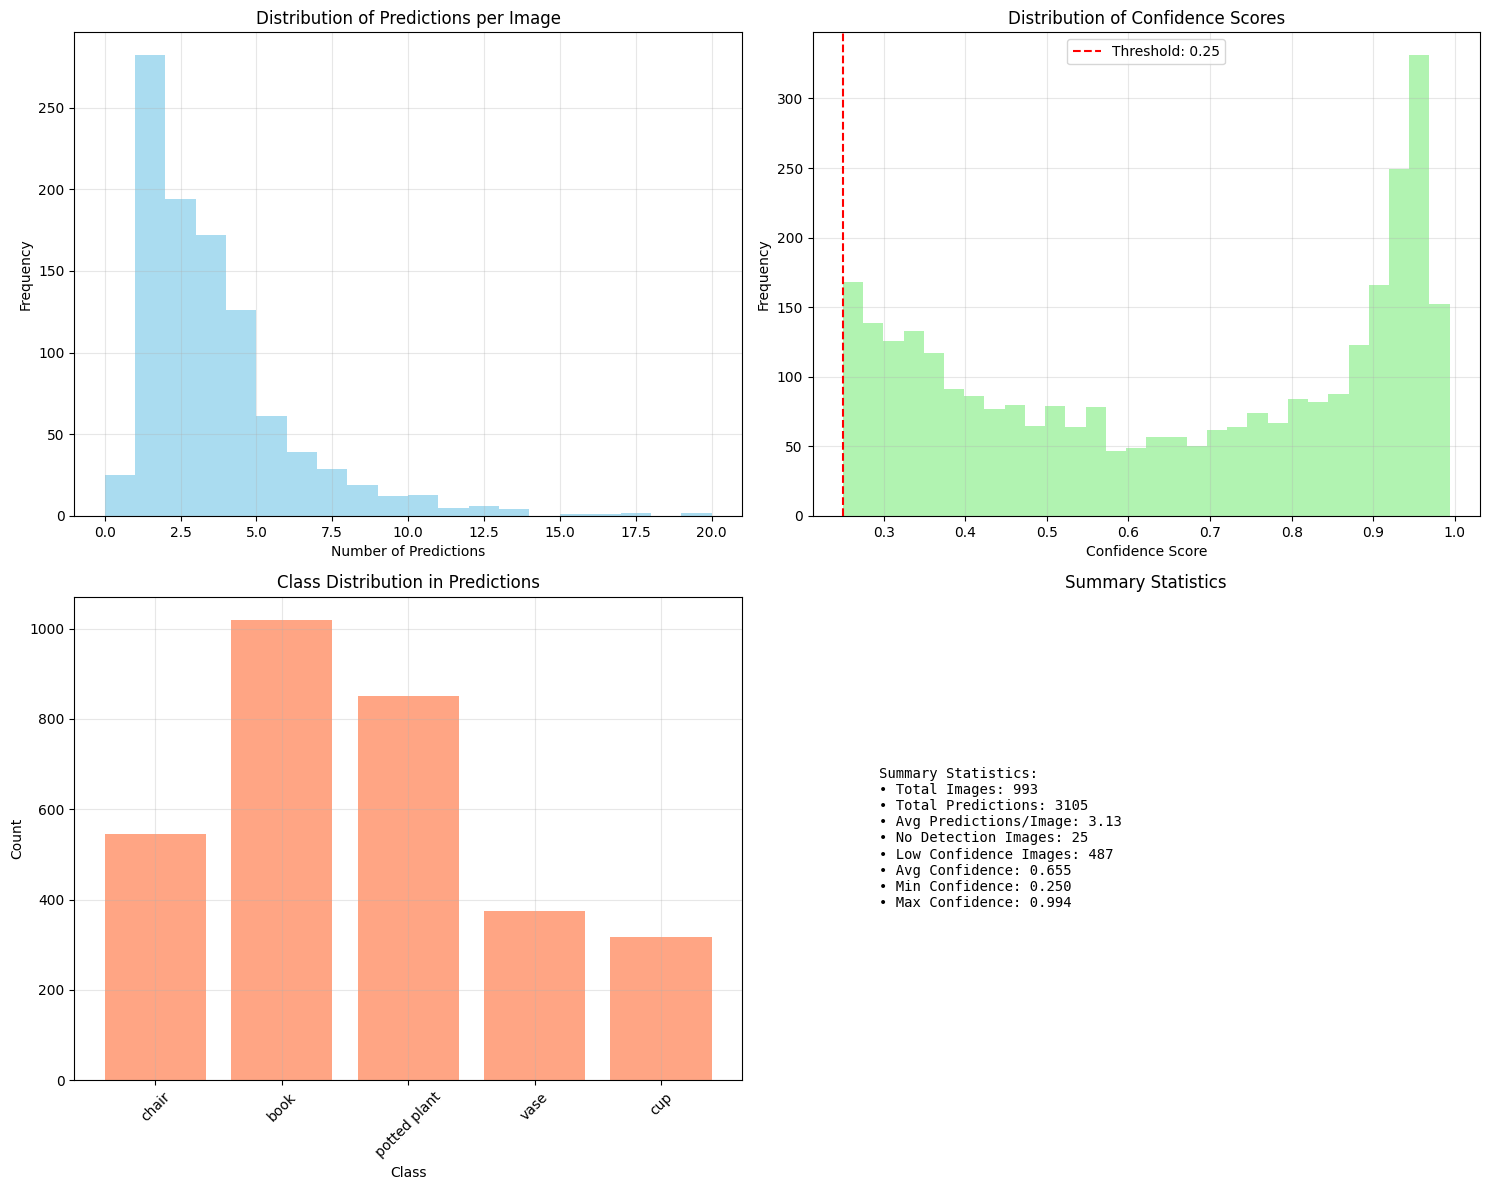

Visualizations saved to results/visualizations/


In [40]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Predictions per image distribution
axes[0, 0].hist(analysis['predictions_per_image'], bins=20, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribution of Predictions per Image')
axes[0, 0].set_xlabel('Number of Predictions')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# 2. Confidence score distribution
axes[0, 1].hist(analysis['confidence_scores'], bins=30, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Distribution of Confidence Scores')
axes[0, 1].set_xlabel('Confidence Score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(CONFIDENCE_THRESHOLD, color='red', linestyle='--', label=f'Threshold: {CONFIDENCE_THRESHOLD}')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Class distribution
if analysis['class_distribution']:
    classes = list(analysis['class_distribution'].keys())
    counts = list(analysis['class_distribution'].values())
    axes[1, 0].bar(classes, counts, alpha=0.7, color='coral')
    axes[1, 0].set_title('Class Distribution in Predictions')
    axes[1, 0].set_xlabel('Class')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3)

# 4. Summary statistics
stats_text = f"""
Summary Statistics:
• Total Images: {analysis['total_images']}
• Total Predictions: {sum(analysis['predictions_per_image'])}
• Avg Predictions/Image: {np.mean(analysis['predictions_per_image']):.2f}
• No Detection Images: {len(analysis['no_detection_images'])}
• Low Confidence Images: {len(analysis['low_confidence_images'])}
• Avg Confidence: {np.mean(analysis['confidence_scores']):.3f}
• Min Confidence: {np.min(analysis['confidence_scores']) if analysis['confidence_scores'] else 'N/A':.3f}
• Max Confidence: {np.max(analysis['confidence_scores']) if analysis['confidence_scores'] else 'N/A':.3f}
"""

axes[1, 1].text(0.1, 0.5, stats_text, transform=axes[1, 1].transAxes,
               fontsize=10, verticalalignment='center', fontfamily='monospace')
axes[1, 1].set_title('Summary Statistics')
axes[1, 1].axis('off')

plt.tight_layout()

# Ensure the visualizations directory exists before saving
os.makedirs('results/visualizations', exist_ok=True)
plt.savefig('results/visualizations/baseline_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualizations saved to results/visualizations/")


## Step 9: Generate Detailed Reports


In [41]:
# Generate detailed CSV reports

# 1. Detailed predictions report
if analysis['detailed_report']:
    df_detailed = pd.DataFrame(analysis['detailed_report'])
    df_detailed.to_csv('results/baseline_detailed_predictions.csv', index=False)
    print(f"Detailed predictions saved: {len(df_detailed)} records")

# 2. Low confidence images report
if analysis['low_confidence_images']:
    df_low_conf = pd.DataFrame(analysis['low_confidence_images'])
    df_low_conf.to_csv('results/baseline_low_confidence_images.csv', index=False)
    print(f"Low confidence images report: {len(df_low_conf)} images")

# 3. No detection images report
if analysis['no_detection_images']:
    df_no_det = pd.DataFrame({'image': analysis['no_detection_images']})
    df_no_det.to_csv('results/baseline_no_detection_images.csv', index=False)
    print(f"No detection images report: {len(df_no_det)} images")

# 4. Summary report
summary_data = {
    'Metric': [
        'Total Images',
        'Total Predictions',
        'Average Predictions per Image',
        'Images with No Detections',
        'Images with Low Confidence',
        'Average Confidence Score',
        'Minimum Confidence Score',
        'Maximum Confidence Score'
    ],
    'Value': [
        analysis['total_images'],
        sum(analysis['predictions_per_image']),
        f"{np.mean(analysis['predictions_per_image']):.2f}",
        len(analysis['no_detection_images']),
        len(analysis['low_confidence_images']),
        f"{np.mean(analysis['confidence_scores']):.3f}" if analysis['confidence_scores'] else 'N/A',
        f"{np.min(analysis['confidence_scores']):.3f}" if analysis['confidence_scores'] else 'N/A',
        f"{np.max(analysis['confidence_scores']):.3f}" if analysis['confidence_scores'] else 'N/A'
    ]
}

df_summary = pd.DataFrame(summary_data)
df_summary.to_csv('results/baseline_summary_report.csv', index=False)
print("Summary report generated")


Detailed predictions saved: 3105 records
Low confidence images report: 487 images
No detection images report: 25 images
Summary report generated


## Step 10: Export Results


In [42]:
# Create a zip file with all results
import zipfile

with zipfile.ZipFile('baseline_yolo_evaluation_results.zip', 'w') as zipf:
    # Add all CSV reports
    for file in os.listdir('results'):
        if file.endswith('.csv'):
            zipf.write(f'results/{file}', file)

    # Add visualizations
    if os.path.exists('results/visualizations'):
        for file in os.listdir('results/visualizations'):
            zipf.write(f'results/visualizations/{file}', f'visualizations/{file}')

print("Results packaged into baseline_yolo_evaluation_results.zip")

# Download the results
from google.colab import files
files.download('baseline_yolo_evaluation_results.zip')

print("Download initiated! Check your downloads folder.")


Results packaged into baseline_yolo_evaluation_results.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download initiated! Check your downloads folder.
